# Warping as measured by distance ratio

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
sns.set_context("talk")

#### Function for loading results

In [2]:
def load_results(results_fn, rep_name):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get ratio results
    analysis = data['analysis']
    ratios = []
    for run in analysis:
        ratios.append([s['distance_ratio'][rep_name]['ratio'] for s in run])
    dist_ratios = 1 / np.array(ratios)
    
    # Get congruent vs. incongruent accuracy results
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run['train_accs']])
        incong_accs.append([s['incong_acc'] for s in run['train_accs']])
    cong_accs = np.mean(cong_accs, axis=0)
    incong_accs = np.mean(incong_accs, axis=0)
    acc_ratios = incong_accs/cong_accs
    return dist_ratios, acc_ratios

#### Function for plotting results

In [12]:
def plot_ratio(dist_ratios, acc_ratios, title, save_fn):
    n_checkpoints = len(acc_ratios)
    fig, ax = plt.subplots(figsize=(20,6))
    ax = sns.boxplot(data=dist_ratios)
    ax = sns.stripplot(data=dist_ratios)
    ax.axhline(y=1, color='r', linewidth=2)
    ax = sns.lineplot(data=acc_ratios, color='black', err_style="bars", markers=True, dashes=False)
    ax.set_title(title)
    ax.legend(["Accuracy Ratio (incongruent / congruent)"])
    ax.set_xticklabels([i*analyze_every for i in range(n_checkpoints)])
    ax.set_xlabel("Steps")
    ax.set_ylabel("Ratio (incongruent / congruent)")
    ax.set_ylim([0.0, 1.6])
    
    # Save figure
    if save_fn is not None:
        #plt.savefig(save_fn, dpi=1000, format='eps', bbox_inches='tight')
        plt.savefig(save_fn, dpi=1000, format='png', bbox_inches='tight')
    
    plt.show()

## MLP

In [66]:
results_fn = 'mlp.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/mlp_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


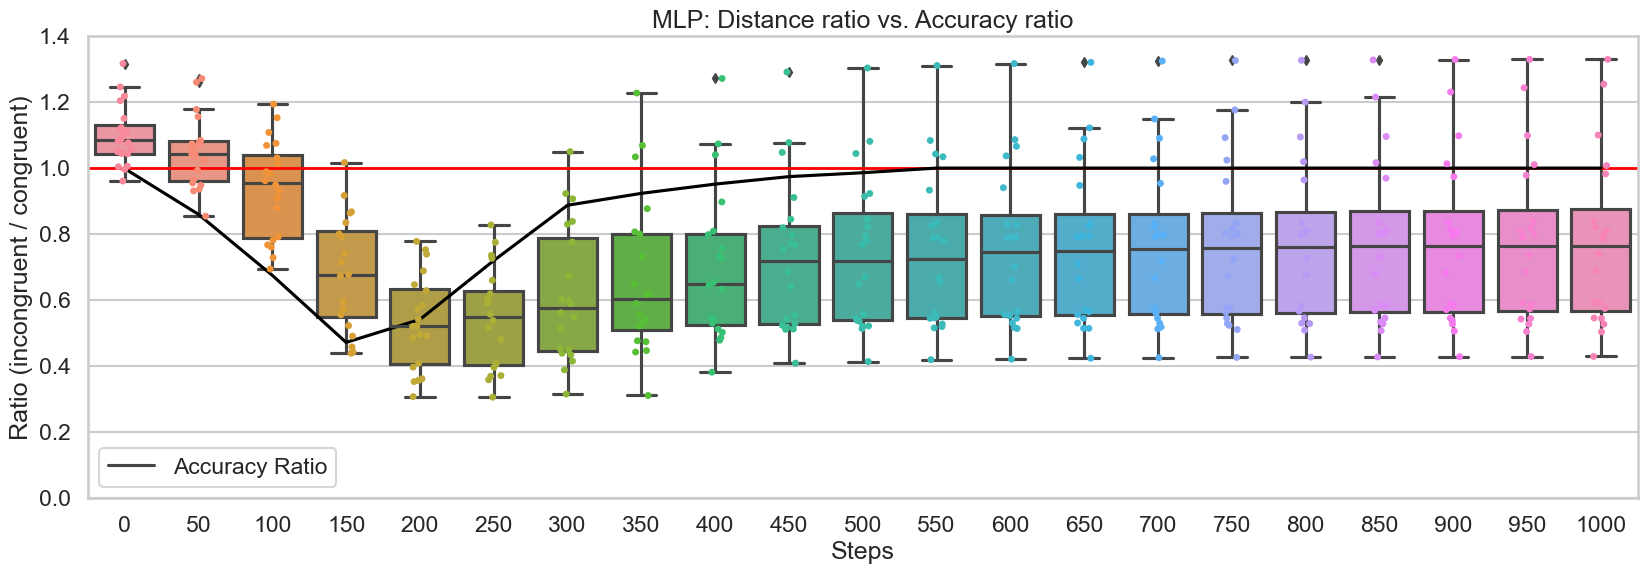

In [67]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## MLP with balanced training

In [68]:
results_fn = 'mlp_balance.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP with balanced training: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/mlp_balance_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


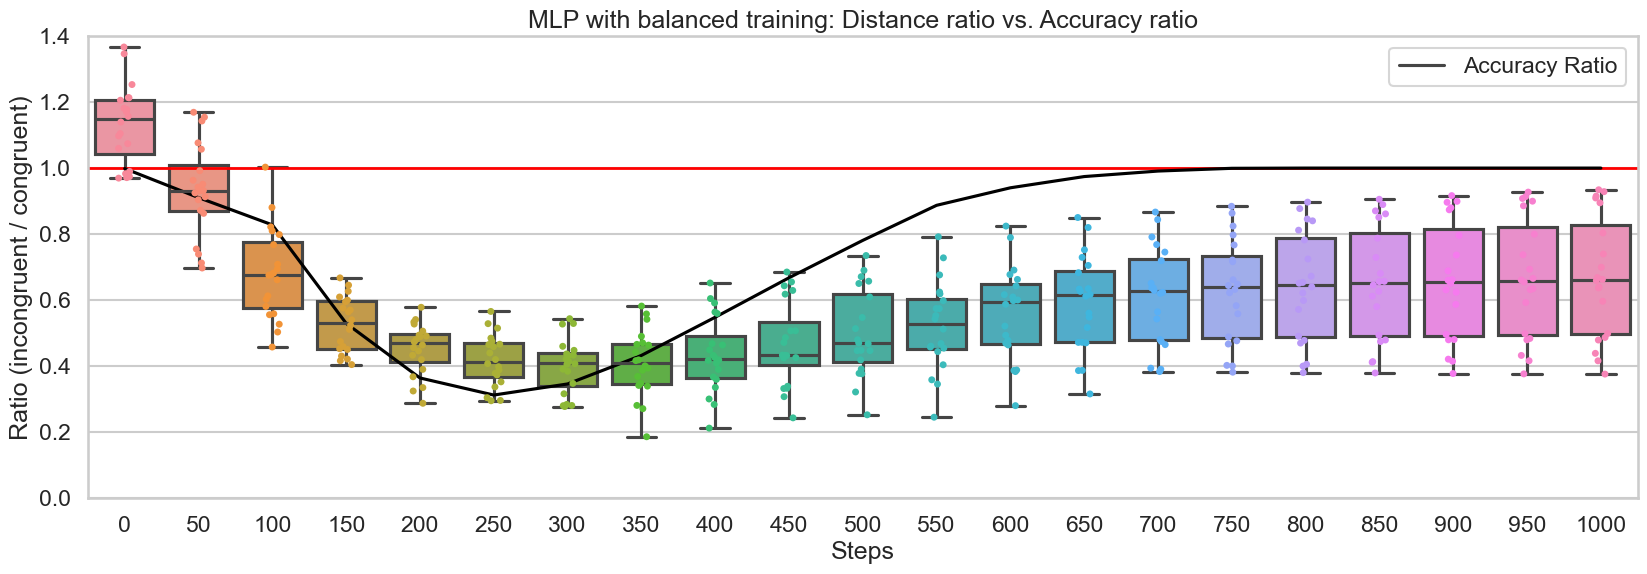

In [69]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## MLP in 6x6 grid

In [70]:
results_fn = 'mlp_6x6.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP trained on 6x6: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/mlp_6x6_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


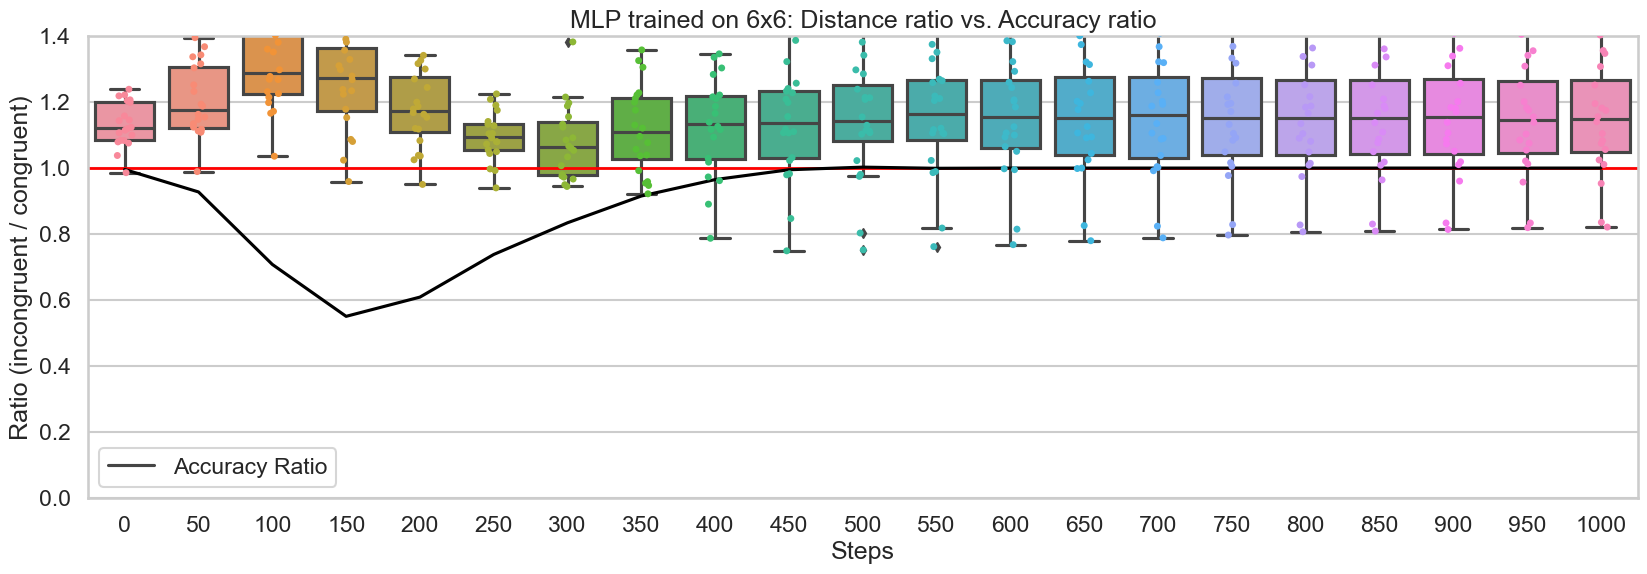

In [71]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## RNN

In [13]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50
title = "Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/rnn_ratio.png'

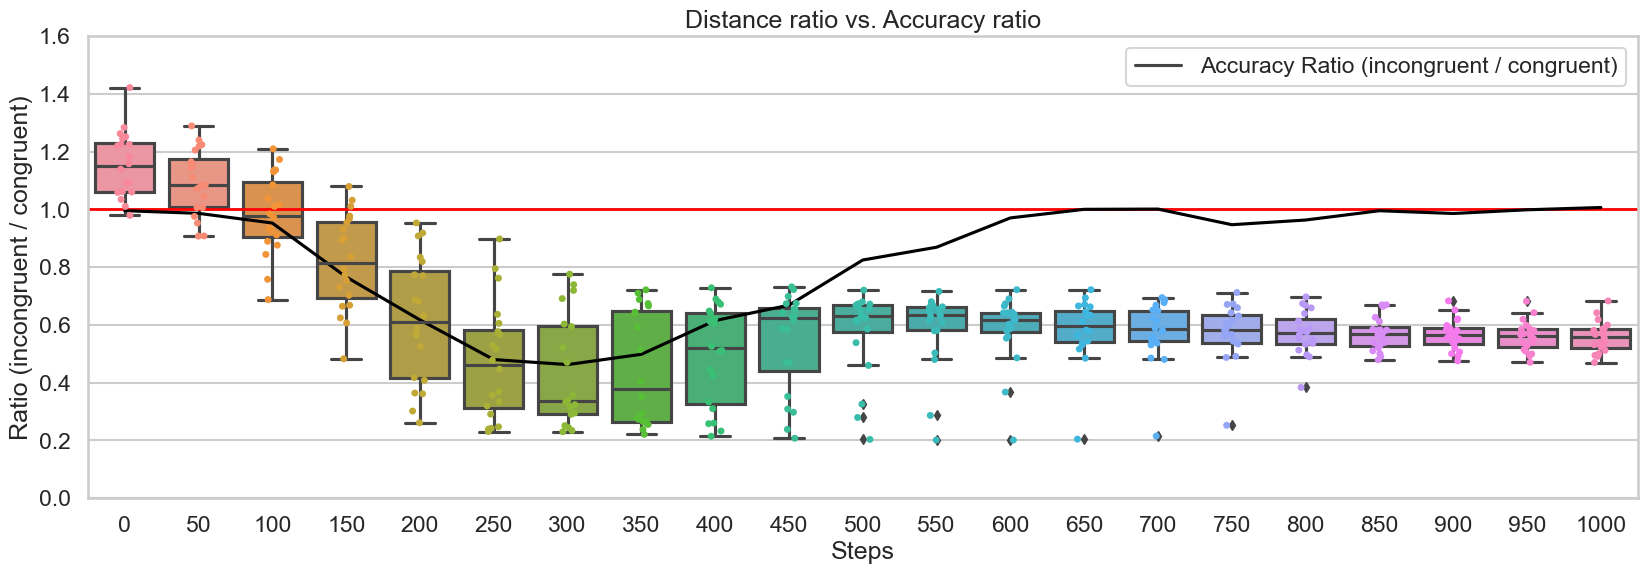

In [14]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## RNN with balanced training

In [74]:
results_fn = 'rnn_balance.P'
rep_name = 'average'
analyze_every = 50
title = "RNN with balanced training: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/rnn_balance_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


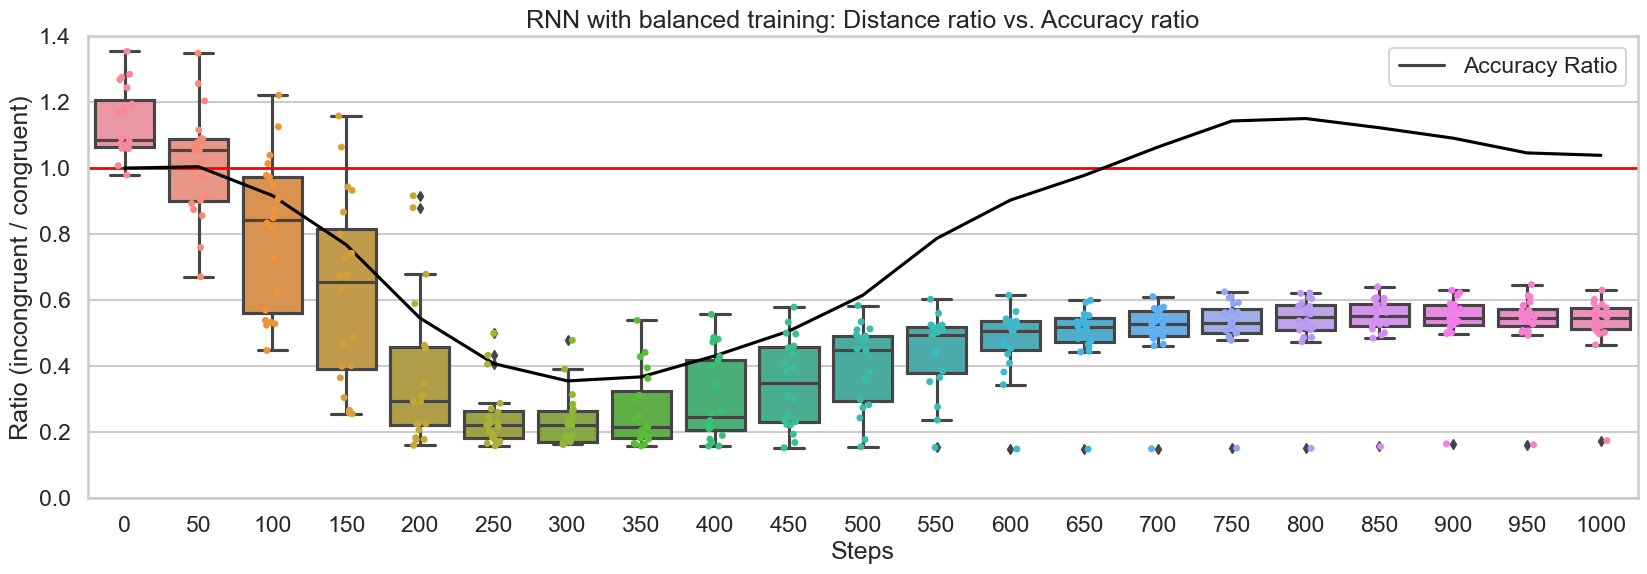

In [75]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## RNN in 6x6 grid

In [76]:
results_fn = 'rnn_6x6.P'
rep_name = 'average'
analyze_every = 50
title = "RNN in 6x6 grid: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/rnn_6x6_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


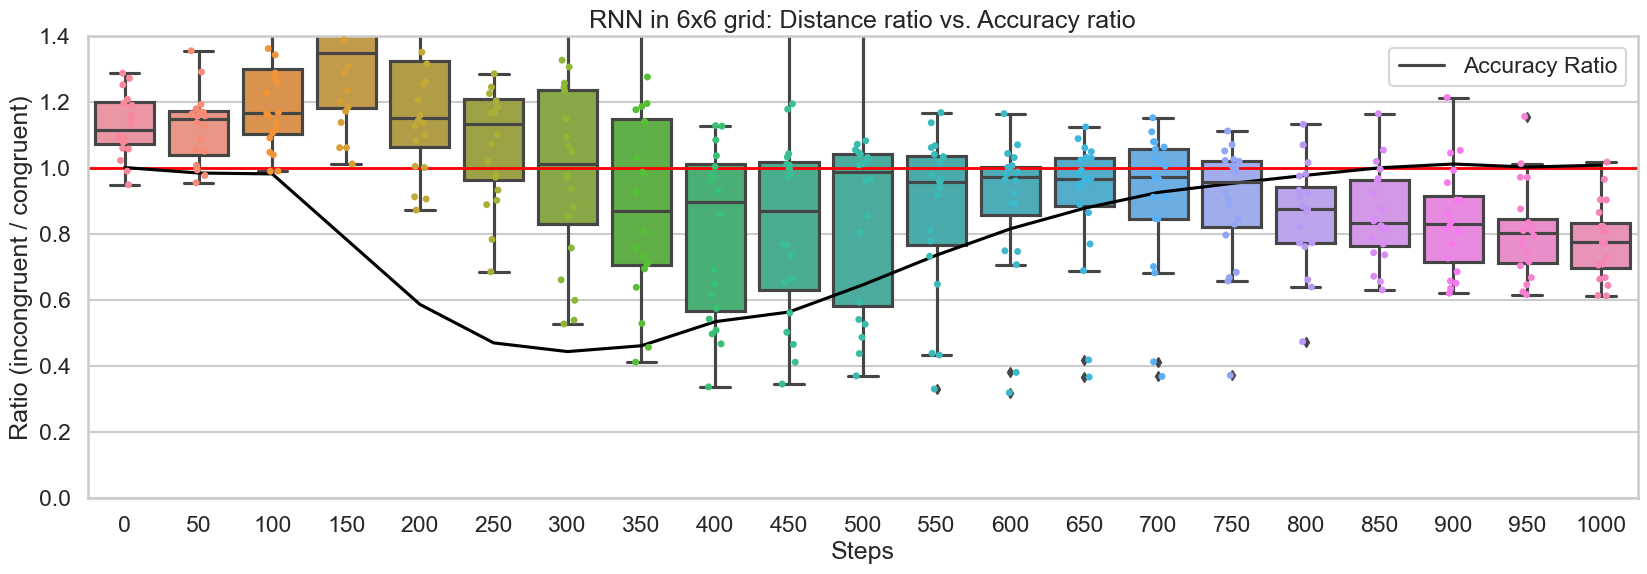

In [77]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## RNN with context last

In [78]:
results_fn = 'rnn_ctx_last.P'
rep_name = 'average'
analyze_every = 50
title = "RNN with context last: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/rnn_ctx_last_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


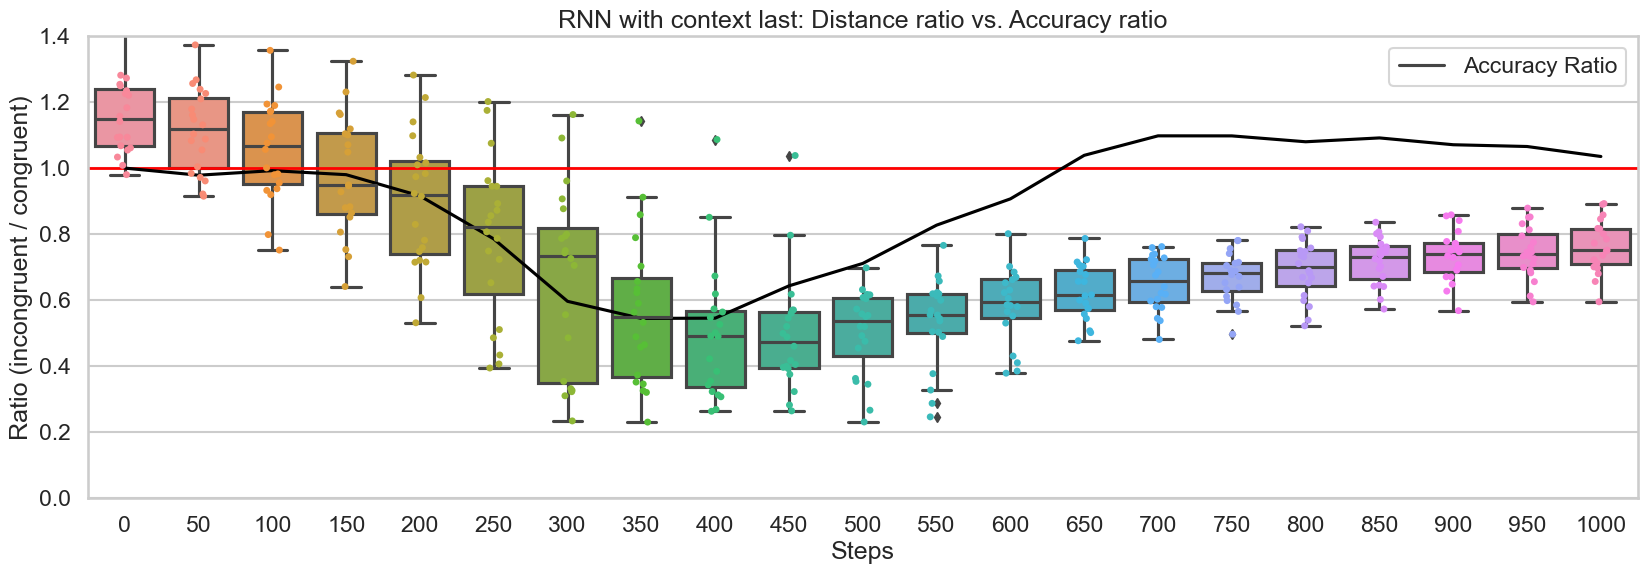

In [79]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## Step-wise MLP

In [80]:
results_fn = 'step_mlp.P'
rep_name = 'average'
analyze_every = 50
title = "Step-wise MLP: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/step_mlp_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


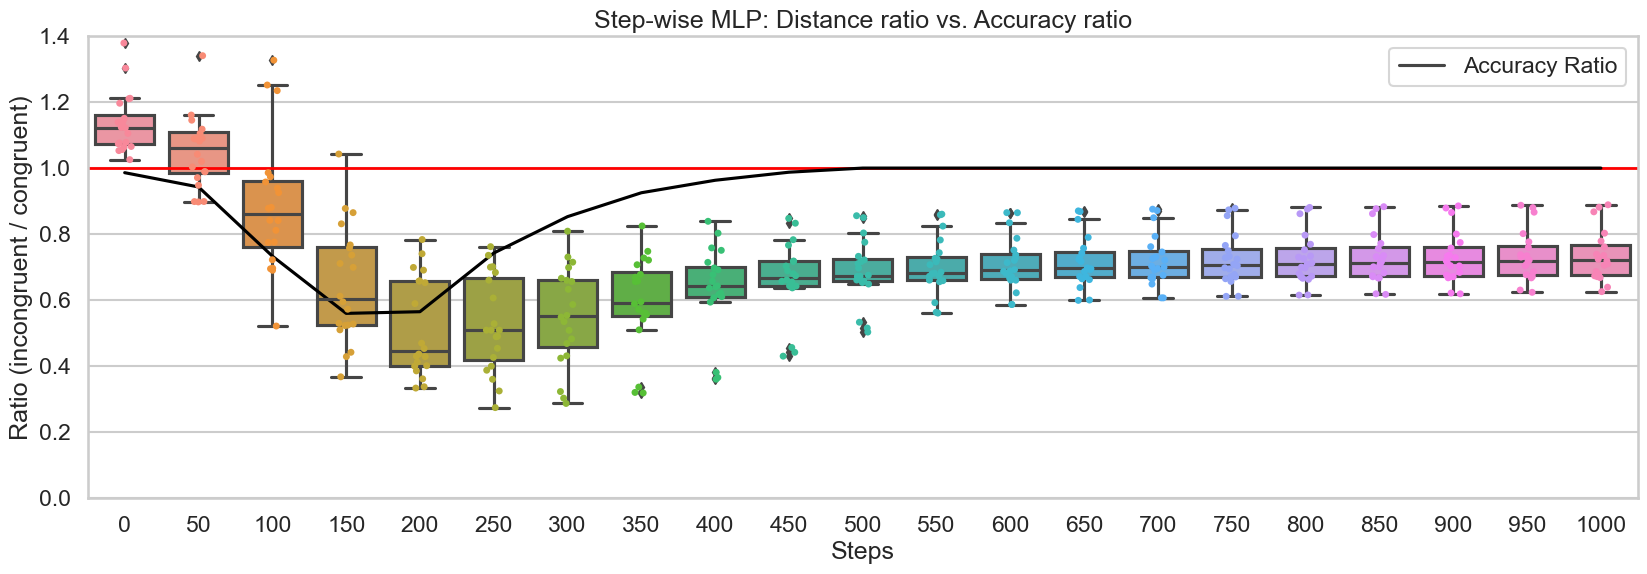

In [81]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)

## Truncated RNN

In [82]:
results_fn = 'trunc_rnn.P'
rep_name = 'average'
analyze_every = 50
title = "Truncated RNN: Distance ratio vs. Accuracy ratio"
save_fn = '../../figures/trunc_rnn_ratio.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


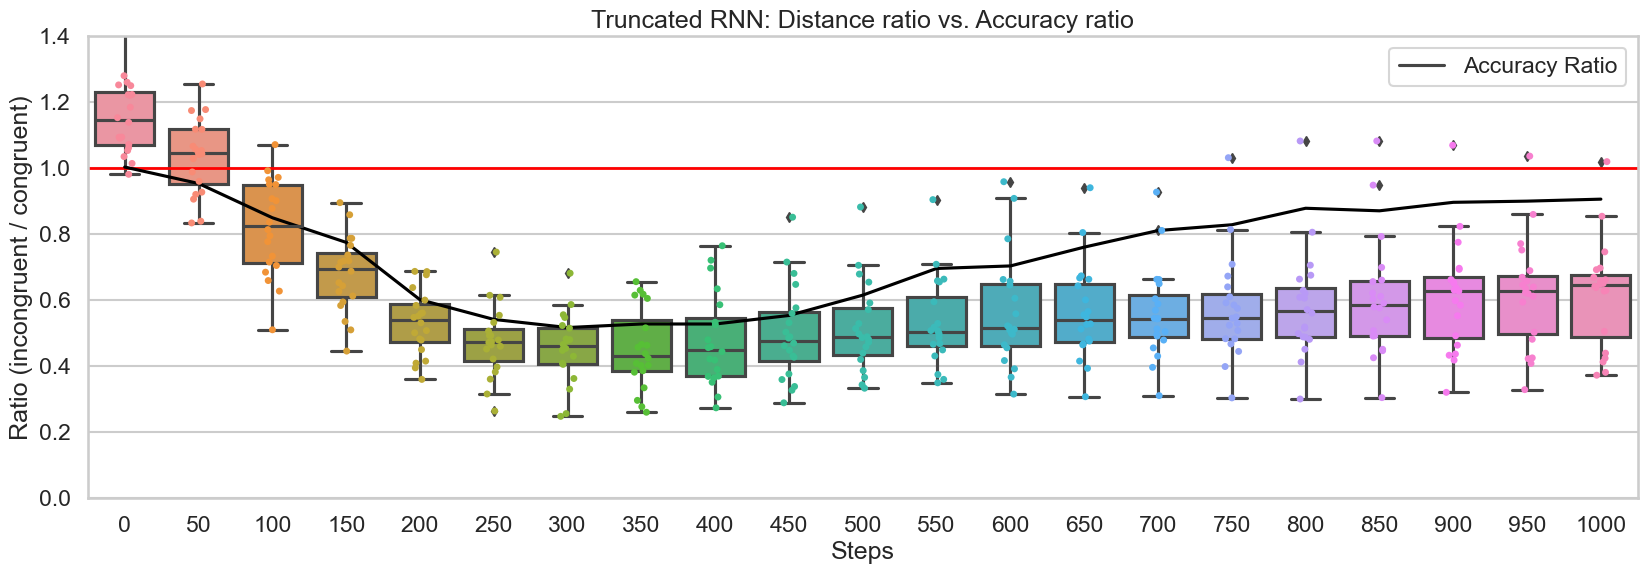

In [83]:
dist_ratios, acc_ratios = load_results(results_fn, rep_name)
plot_ratio(dist_ratios, acc_ratios, title, save_fn)